In [44]:
import pandas as pd
import spacy
import matplotlib.pyplot as plt
import re
from wordcloud import WordCloud

nlp = spacy.load('en_core_web_sm')

In [45]:
df = pd.read_csv("legal_text_classification.csv")

df.sample(10)

,case_id,case_outcome,case_title,case_text
15373,Case15501,referred to,Avon Downs Pty Limited v Commissioner for Taxa...,In Avon Downs Pty Limited v Commissioner for T...
2467,Case2490,cited,Ann Street Mezzanine Pty Limited (in liq) v Be...,there is a real risk of the same facts being r...
8892,Case8978,applied,Minister for Immigration and Multicultural and...,"The ""criminal record"" can only record charged ..."
20899,Case21085,referred to,John Fairfax &amp; Sons Pty Limited v Commissi...,There was no issue about s 8-1(1). It should b...
13000,Case13120,cited,SW Hart &amp; Co Pty Ltd v Edwards Hot Water S...,"For infringement of copyright, the infringing ..."
5084,Case5132,followed,S58 of 2003 v Minister for Immigration &amp; M...,I accept the first respondent's submissions. I...
8750,Case8835,cited,Willey v Synan [1935] HCA 76 ; (1935) 54 CLR 175,The application for security for costs must th...
9121,Case9211,referred to,Sindel v Georgiou [1984] HCA 58 ; (1984) 154 C...,An executed document becomes an agreement when...
9400,Case9494,referred to,Beecham Group Ltd v Bristol Laboratories Ltd (...,Beecham Group Ltd v Bristol Laboratories Ltd (...
3480,Case3518,referred to,Bahonko v Sterjov [2007] FCA 1556,This is an application for leave to appeal and...


Le dataset s'appelle "Legal Text Classification". Il contient 3 colonnes qui nous intéressent:
 - case_outcome : L'action choisie à propos du dossier légal en question.
 - case_title : Le titre donné au dossier légal.
 - case_text : La description du dossier légal.

In [46]:
df.shape

(24985, 4)

In [47]:
# Pas de valeur dupliquée

df.duplicated().unique()

array([False])

In [48]:
print(df["case_id"].isna().unique())

print(df["case_outcome"].isna().unique())

print(df["case_title"].isna().unique())

print(df["case_text"].isna().unique())

# case_text contient des valeurs NaN

[False]
[False]
[False]
[False  True]


In [49]:
df["case_text"].isna().sum()

176

In [50]:
print(df["case_outcome"].unique())

# Voila les résultats qui nous intéressent. On va analyser les données pour montrer quels sont les mots
# les plus courants dans chaque résultat ici

['cited' 'applied' 'followed' 'referred to' 'related' 'considered'
 'discussed' 'distinguished' 'affirmed' 'approved']


In [51]:
df_cited = df[df["case_outcome"] == "cited"]
df_applied = df[df["case_outcome"] == "applied"]
df_followed = df[df["case_outcome"] == "followed"]
df_referred = df[df["case_outcome"] == "referred to"]
df_related = df[df["case_outcome"] == "related"]
df_considered = df[df["case_outcome"] == "considered"]
df_discussed = df[df["case_outcome"] == "discussed"]
df_distinguished = df[df["case_outcome"] == "distinguished"]
df_affirmed = df[df["case_outcome"] == "affirmed"]
df_approved = df[df["case_outcome"] == "approved"]

# On sépare chaque target pour les analyser et les comparer plus tard

In [74]:
df_cited_text = ""
for line in df_cited["case_text"]:
    df_cited_text = df_cited_text + str(line) + "\n"

In [75]:
df_applied_text = ""
for line in df_applied["case_text"]:
    df_applied_text = df_applied_text + str(line) + "\n"

In [76]:
df_followed_text = ""
for line in df_followed["case_text"]:
    df_followed_text = df_followed_text + str(line) + "\n"

In [77]:
df_referred_text = ""
for line in df_referred["case_text"]:
    df_referred_text = df_referred_text + str(line) + "\n"

In [78]:
df_related_text = ""
for line in df_related["case_text"]:
    df_related_text = df_related_text + str(line) + "\n"

In [79]:
df_considered_text = ""
for line in df_considered["case_text"]:
    df_considered_text = df_considered_text + str(line) + "\n"

In [80]:
df_discussed_text = ""
for line in df_discussed["case_text"]:
    df_discussed_text = df_discussed_text + str(line) + "\n"

In [81]:
df_distinguished_text = ""
for line in df_distinguished["case_text"]:
    df_distinguished_text = df_distinguished_text + str(line) + "\n"

In [82]:
df_affirmed_text = ""
for line in df_affirmed["case_text"]:
    df_affirmed_text = df_affirmed_text + str(line) + "\n"

In [83]:
df_approved_text = ""
for line in df_approved["case_text"]:
    df_approved_text = df_approved_text + str(line) + "\n"

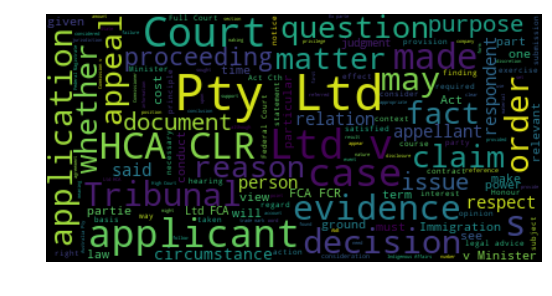

In [84]:
# On va générer un word cloud pour chaque target et avoir une première analyse des les plus répétés.

wordcloud = WordCloud().generate(str(df_cited_text))

wordcloud = WordCloud(max_font_size=40).generate(str(df_cited_text))
plt.figure()
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

Mots clés les plus présents:

Pty Ltd, Ltd v, HCA CLR, Court, Tribunal, applicant

HCA (Hospital Corporation of America)

CLR (Commonwealth Law Reports)

Pty Ltd (Proprietary Limited)


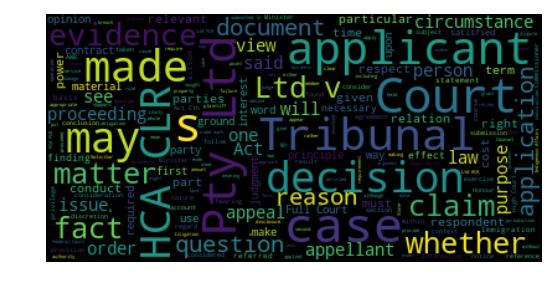

In [85]:
wordcloud = WordCloud().generate(str(df_applied_text))

wordcloud = WordCloud(max_font_size=40).generate(str(df_applied_text))
plt.figure()
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

Mots clés les plus présents:

HCA, CLR, Pty Ltd, Tribunal, Court, applicant, decision

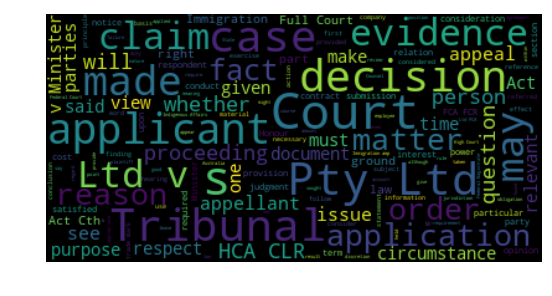

In [86]:
wordcloud = WordCloud().generate(str(df_followed_text))

wordcloud = WordCloud(max_font_size=40).generate(str(df_followed_text))
plt.figure()
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

Mots clés les plus présents:

Court, Tribunal, applicant, decision, Pty Ltd

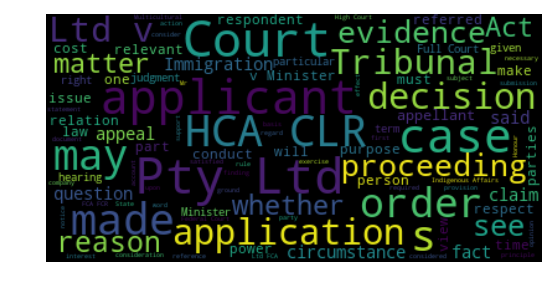

In [87]:
wordcloud = WordCloud().generate(str(df_referred_text))

wordcloud = WordCloud(max_font_size=40).generate(str(df_referred_text))
plt.figure()
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

Mots clés les plus présents:
    
Pty Ltd, Court, HCA CLR, applicant

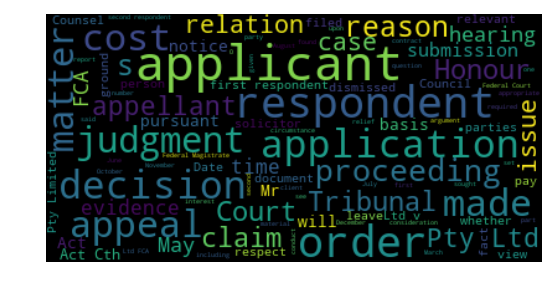

In [88]:
wordcloud = WordCloud().generate(str(df_related_text))

wordcloud = WordCloud(max_font_size=40).generate(str(df_related_text))
plt.figure()
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

Mots clés les plus présents:

applicant, respondant, judgment, decision

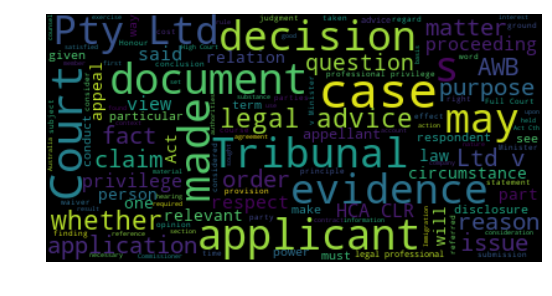

In [89]:
wordcloud = WordCloud().generate(str(df_considered_text))

wordcloud = WordCloud(max_font_size=40).generate(str(df_considered_text))
plt.figure()
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

Mots clés les plus présents:

Tribunal, document, applicant, decision, Court, applicant, evidence

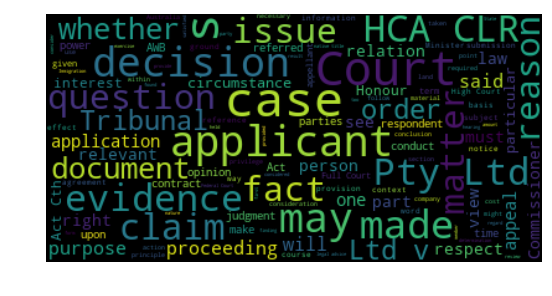

In [97]:
wordcloud = WordCloud().generate(str(df_discussed_text))

wordcloud = WordCloud(max_font_size=40).generate(str(df_discussed_text))
plt.figure()
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

Mots clés les plus présents:

Court, HCA CLR, Pty Ltd, case, decision, applicant

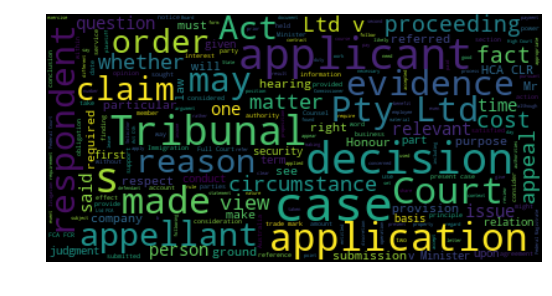

In [91]:
wordcloud = WordCloud().generate(str(df_distinguished_text))

wordcloud = WordCloud(max_font_size=40).generate(str(df_distinguished_text))
plt.figure()
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

Mots clés les plus présents:

applicant, application, Tribunal, decision, case

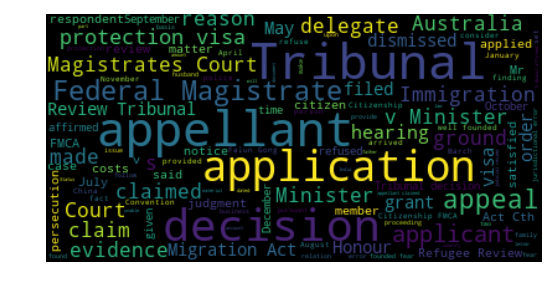

In [92]:
wordcloud = WordCloud().generate(str(df_affirmed_text))

wordcloud = WordCloud(max_font_size=40).generate(str(df_affirmed_text))
plt.figure()
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

Mots clés les plus présents:

Tribunal, appelant, application, decision, Federal Magistrate

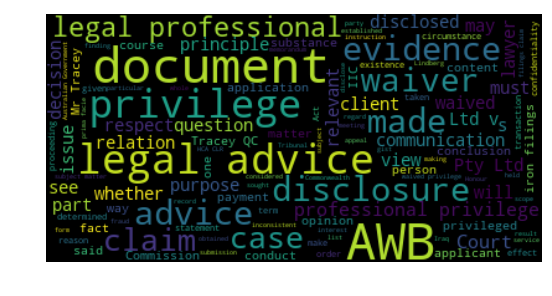

In [93]:
wordcloud = WordCloud().generate(str(df_approved_text))

wordcloud = WordCloud(max_font_size=40).generate(str(df_approved_text))
plt.figure()
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

Mots clés les plus présents:

document, privilege, legal advice, disclosure, AWB

AWB (Air WayBill) : Un contrat signé d'échange matériel entre deux personnes.

En conclusion, on remarque que durant le début et la continuation de chaque cas légal, plusieurs mots clés reviennent
en particulier, notemment Pty Ltd, HCA CLR, Court, Tribunal.

Quand un cas entre dans une des phases finales ou se termine, alors ces mots disparaissent presque entièrement et on
retrouve des mots clés comme document, decision, evidence, judgement.

En fonction de la présence relative des mots de la première ou deuxième liste, on peut donc en induire l'état d'avancement du cas légal en question, sans même avoir à regarder la colonne case_outcome.